# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm

In [2]:
#%matplotlib inline
from IPython.core.pylabtools import figsize

figsize(12, 8)

sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
h_samp = get_sample(athletes, 'height', 3000)
w_samp = get_sample(athletes, 'weight', 3000)
alpha = 0.05
w_log = np.log(w_samp)

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [6]:
def q1():
    shapiro = sct.shapiro(h_samp)
    print(shapiro[1])
    return bool(shapiro[1] > alpha)

In [7]:
q1()

5.681722541339695e-07


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

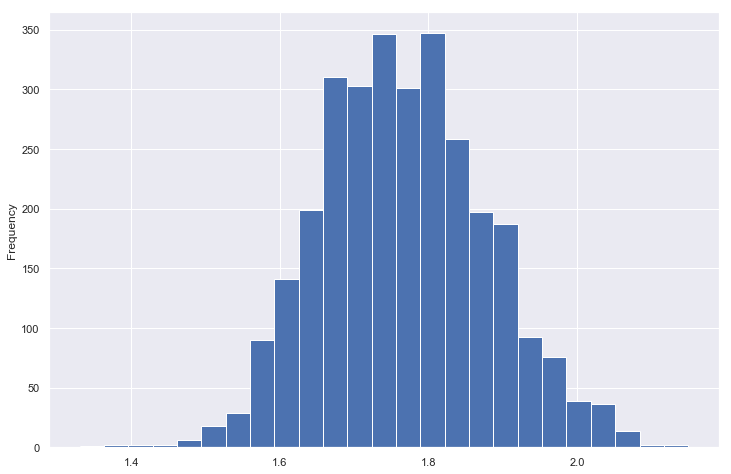

In [8]:
h_samp.plot(kind='hist', bins=25);
# Resposta: Não, pois a forma do gráfico me parece normal, mas o resultado do teste, falso, indica 
# a evidência de que os dados não vêm de uma distribuição normal.

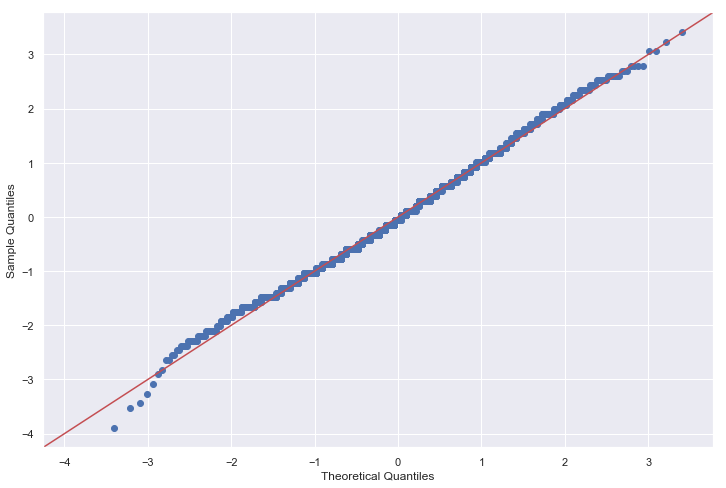

In [9]:
sm.qqplot(h_samp, fit=True, line='45');
# Resposta: Não há, pois conforme aula, os valores típicos de α/alpha são 0.025, 0.05 e 0.10 e o P neste caso é bem menor.

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [10]:
def q2():
    jBera = sct.jarque_bera(h_samp)
    print(jBera[1])
    return bool(jBera[1] > alpha)

In [11]:
q2()

0.001478366424594868


False

__Para refletir__:

* Esse resultado faz sentido?

In [12]:
# Resposta: creio que sim, pois novamente indica que a amostra não é normal, pois se fosse, P deveria estar mais próximo de 0.5.

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [13]:
def q3():
    pearson = sct.normaltest(w_samp)
    print(pearson[1])
    return bool(pearson[1] > alpha)

In [14]:
q3()

1.5898922918029537e-111


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

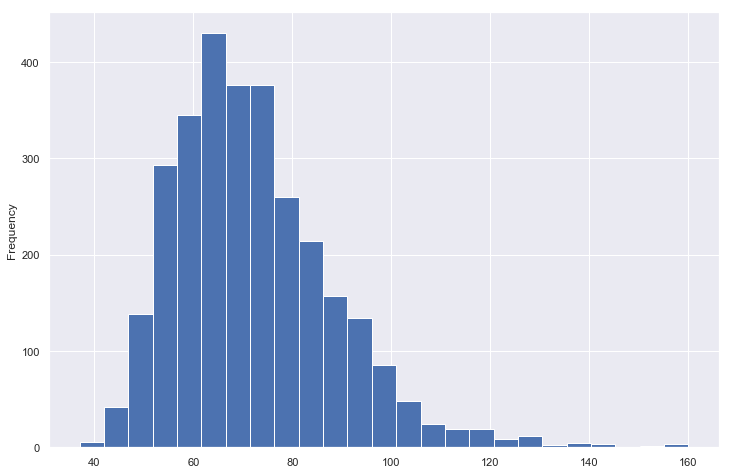

In [15]:
w_samp.plot(kind='hist', bins=25);
# Resposta: agora sim, pois o gráfico não indica uma curva normal e o teste fez o mesmo.

## Questão 4

Realize uma transformação logarítmica na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [16]:
def q4():
    pearson = sct.normaltest(w_log)
    print(pearson[1])
    return bool(pearson[1] > alpha)

In [17]:
q4()

1.0705572101256944e-10


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

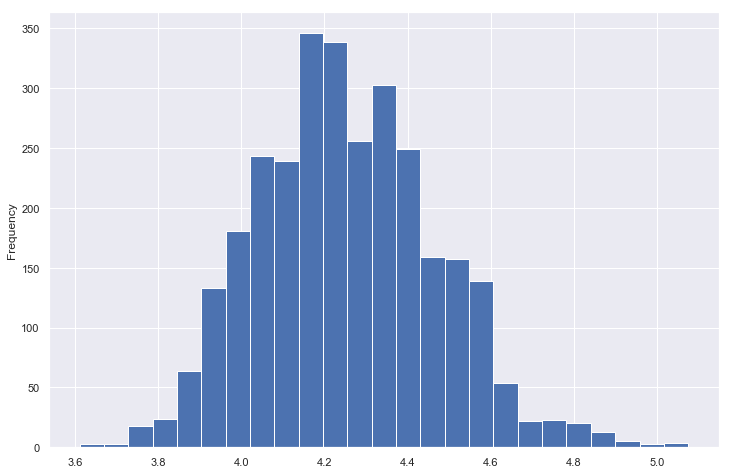

In [18]:
w_log.plot(kind='hist', bins=25);
# Resposta: não, pois novamente a curva é normal.

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

In [19]:
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [20]:
h_bra = athletes.query('nationality == "BRA"')['height'].dropna()
h_usa = athletes.query('nationality == "USA"')['height'].dropna()
h_can = athletes.query('nationality == "CAN"')['height'].dropna()
print(h_bra.size, h_usa.size, h_can.size)

476 560 320


## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [21]:
def q5():
    bra_usa = sct.ttest_ind(h_bra, h_usa, equal_var=False)
    print(bra_usa[1])
    return bool(bra_usa[1] > alpha)

In [22]:
q5()

0.001308004183014406


False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [23]:
def q6():
    bra_can = sct.ttest_ind(h_bra, h_can, equal_var=False)
    print(bra_can[1])
    return bool(bra_can[1] > alpha)

In [24]:
q6()

0.5230827295443041


True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [25]:
def q7():
    usa_can = sct.ttest_ind(h_usa, h_can, equal_var=False)
    return float(round(usa_can[1], 8))

In [26]:
q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?